In [1]:
from colorrefinement import *
from c2 import *
import json

In [2]:
#with open('datasets/ppi/ppi-G.json') as f:
#    data = json.load(f)

#graph = nx.node_link_graph(data)

In [3]:
graph = nx.gnp_random_graph(150, 0.05)

In [4]:

from cProfile import Profile
from pstats import SortKey, Stats
with Profile() as prof:
    cr = color_refinement(graph)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(40)
    )

         23832 function calls (22750 primitive calls) in 0.011 seconds

   Ordered by: cumulative time
   List reduced from 54 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      600    0.001    0.000    0.007    0.000 colorrefinement.py:105(__init__)
        1    0.000    0.000    0.007    0.007 colorrefinement.py:6(color_refinement)
        1    0.000    0.000    0.007    0.007 colorrefinement.py:36(__init__)
        1    0.001    0.001    0.007    0.007 colorrefinement.py:78(_refine)
      600    0.002    0.000    0.005    0.000 {built-in method builtins.sorted}
     6355    0.002    0.000    0.003    0.000 colorrefinement.py:153(__lt__)
4880/3800    0.001    0.000    0.001    0.000 colorrefinement.py:125(__eq__)
      600    0.001    0.000    0.001    0.000 {built-in method builtins.hash}
     4140    0.001    0.000    0.001    0.000 colorrefinement.py:85(<genexpr>)
        1    0.000    0.000    0.001    0.001 colorrefinemen

In [5]:
depth = graph.color_refinement.depth
depth

2

In [6]:
graph.nodes[3]

{}

In [7]:
phi = ExistsGeq(30, Var.x, ExistsGeq(10, Var.y, E(Var.x, Var.y)))
phi

∃≥30x.∃≥10y.E(x, y)

In [8]:
len([node for node in graph.nodes if graph.degree[node] >= 10])

46

In [9]:
from cProfile import Profile
from pstats import SortKey, Stats
with Profile() as prof:
    phi.evaluate(graph)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(40)
    )

         76032 function calls (75892 primitive calls) in 0.075 seconds

   Ordered by: cumulative time
   List reduced from 135 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.040    0.013 base_events.py:1874(_run_once)
    15093    0.019    0.000    0.034    0.000 c2.py:705(_evaluate)
    29374    0.010    0.000    0.010    0.000 reportviews.py:1267(__contains__)
        2    0.000    0.000    0.006    0.003 {method 'run' of '_contextvars.Context' objects}
      3/1    0.034    0.011    0.006    0.006 events.py:82(_run)
        1    0.000    0.000    0.006    0.006 kernelbase.py:283(poll_control_queue)
        1    0.000    0.000    0.006    0.006 _base.py:537(set_result)
        1    0.000    0.000    0.006    0.006 _base.py:337(_invoke_callbacks)
        1    0.000    0.000    0.006    0.006 futures.py:394(_call_set_state)
    29374    0.004    0.000    0.004    0.000 reportviews.py:1088(__call__

In [10]:
v = next(v for v in graph.nodes if graph.degree[v] >= 10)
v, GuardedExistsGeq(10, Var.y, E(Var.x, Var.y)).evaluate(graph, v)

(0, True)

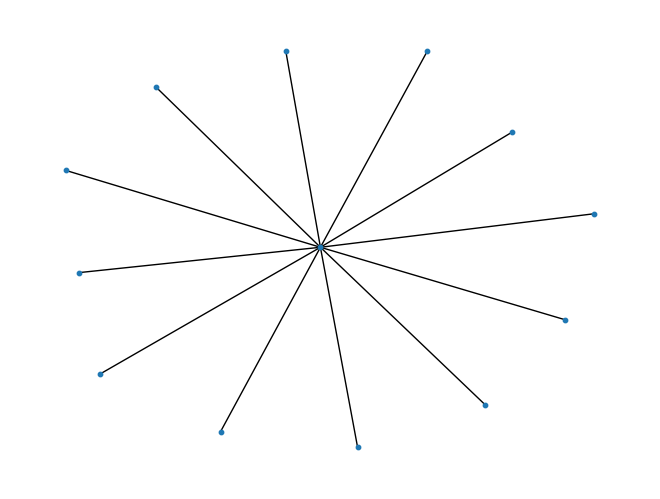

In [11]:
nx.draw(cr.node_colors[1][v].to_networkx(), node_size=10)

In [12]:
from GC2NodeClassifier import GC2NodeClassifier
import numpy as np

In [13]:
graph.color_refinement.depth

2

In [14]:
len(graph.color_refinement.node_colors[1][v].chi(1).children)

(∃=12x.E(x, y))

In [15]:
cr = graph.color_refinement
cr.node_colors[2][2].chi(2)

(∀x.(E(x, y) → (∃=12y.E(x, y) ∨ ∃=10y.E(x, y) ∨ ∃=6y.E(x, y) ∨ ∃=8y.E(x, y) ∨ ∃=5y.E(x, y))) ∧ (∃=2x.(E(x, y) ∧ ∃=5y.E(x, y)) ∧ ∃=1x.(E(x, y) ∧ ∃=6y.E(x, y)) ∧ ∃=1x.(E(x, y) ∧ ∃=12y.E(x, y)) ∧ ∃=2x.(E(x, y) ∧ ∃=10y.E(x, y)) ∧ ∃=1x.(E(x, y) ∧ ∃=8y.E(x, y))))

In [16]:
cr.depth

2

In [17]:
psi = GuardedExistsGeq(10, Var.y, E(Var.x, Var.y))
clf = GC2NodeClassifier(
    [graph for _ in graph.nodes],
    list(graph.nodes),
    [None for _ in graph.nodes],
    labels=np.array([psi.evaluate(graph, v) for n in graph.nodes])
)

TypeError: cannot convert dictionary update sequence element #0 to a sequence